# Predictive Model 
## Given dataset - Predict if student will get placement or not. 

In [1]:
import pandas as pd 
import numpy as np 
#impoting

In [2]:
#reading the content of our dataset 
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
#preprocessing- removing unrequired column 
df = df.iloc[:,1:] # first slicing for rows ,, 2nd for cloumn
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [10]:
# no null values
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

# EDA

In [11]:
#importing %matplotlib for EDA 
import matplotlib.pyplot as plt 

<Figure size 300x300 with 0 Axes>

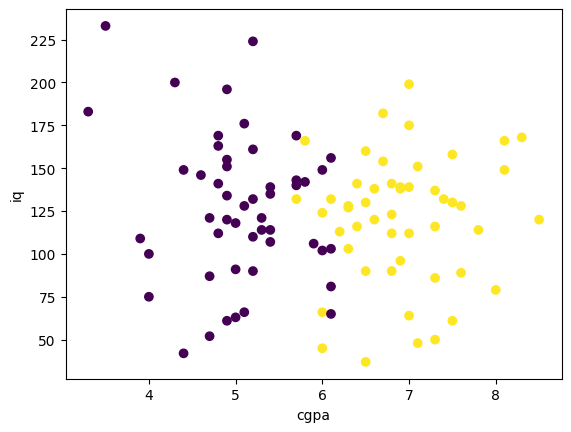

<Figure size 300x300 with 0 Axes>

In [20]:
# using scatter plot for visualization 
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.figure(figsize=(3,3))
#now we want to make ml model who can understand the data and predict  

In [21]:
# storing independent var and dependent var seperately
x = df.iloc[:,:2]  # cgpa,iq
y = df.iloc[:,-1]

In [22]:
x.head()    # 2D tensor vaector

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [24]:
y.head()    #1d tensor  --  scalar

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

# train-test set

In [25]:
# splitting the data for ml algo - training set and splitting set
from sklearn.model_selection import train_test_split

In [26]:
train_test_split(x,y,test_size=0.1) #test_size=0.1 means 10% of data shoub used for testing

[    cgpa     iq
 69   8.5  120.0
 50   3.5  233.0
 27   6.0  124.0
 15   5.1  176.0
 37   8.1  149.0
 ..   ...    ...
 18   4.0  100.0
 16   5.2  224.0
 12   5.4  139.0
 87   5.7  132.0
 75   4.8  169.0
 
 [90 rows x 2 columns],
     cgpa     iq
 47   5.2  161.0
 25   5.0   91.0
 61   7.3  137.0
 4    5.8  142.0
 96   4.4   42.0
 7    5.0   63.0
 56   6.1   65.0
 83   7.5  130.0
 21   7.1  151.0
 59   4.8  112.0,
 69    1
 50    0
 27    1
 15    0
 37    1
      ..
 18    0
 16    0
 12    0
 87    1
 75    0
 Name: placement, Length: 90, dtype: int64,
 47    0
 25    0
 61    1
 4     0
 96    0
 7     0
 56    0
 83    1
 21    1
 59    0
 Name: placement, dtype: int64]

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1)

# Scaling

In [28]:
##scaling -not so important everytime
from sklearn.preprocessing import  StandardScaler   # class - StandardScaler


In [29]:
# object
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)  ## now all value will be between -1 to 1
X_train[:5]

array([[ 0.44694059, -0.86599828],
       [-1.01109588,  0.93280308],
       [-0.49649477,  0.34141633],
       [ 2.16227761, -0.12676484],
       [ 1.56190965, -0.27461153]])

In [32]:
X_test = scaler.fit_transform(X_test)  ## now all value will be between -1 to 1
X_test[:5]

array([[ 1.43427433,  1.00212244],
       [-0.83666003,  0.16398367],
       [ 1.67332005,  1.76737958],
       [ 0.        , -1.62161631],
       [ 0.        , -1.03856326]])

# TRAING MODEL - LOGISTIC REGRESSION

In [33]:
# calling the classifier
from sklearn.linear_model import LogisticRegression # class - LogisticRegression

In [35]:
clf = LogisticRegression()

In [36]:
# model trainging
clf.fit(X_train,Y_train)   # fit funtion is used for traing model

LogisticRegression()

# evaluating the model 

In [41]:
# predicting
y_pred = clf.predict(X_test)

In [39]:
Y_test

61    1
41    0
91    1
56    0
78    0
87    1
35    1
27    1
81    0
23    0
Name: placement, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
# accuracy check
accuracy_score(Y_test,y_pred)

0.6

In [45]:
!pip install mlxtend 

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


In [46]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

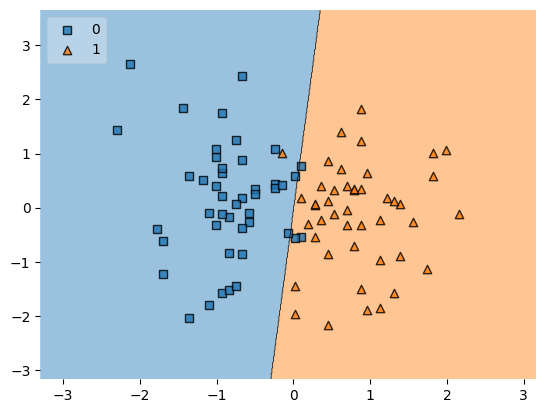

In [49]:
# Plotting decision regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)
#Y_train.values as it was not scaled above

In [ ]:
## Either we can change the model by going through previous steps